# Engineering

In [1]:
%run "../../Libraries/Display.ipynb"
%run "../../Libraries/Standard.ipynb"
%run "../../Libraries/Modelling.ipynb"
%run "../../Libraries/Style.ipynb"
%run "../../Core/Standard.ipynb"
%run "../../Core/Engineering.ipynb"
%run "../../Core/Modelling.ipynb"

In [2]:
style.use('seaborn-whitegrid') or plt.style.use('seaborn-whitegrid')

plt.style.use('seaborn-whitegrid')

sns.set(style="ticks", color_codes=True)

### Initial Values

In [3]:
# Change values to change feature selection.
dummy_variables = False

apply_feature_selection = False

# Choose your model! You can assign any model you like, for instance a Linear model.
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)

# How many features to be selected from the feature selection process
nof_features = 5

apply_pca = False

variance = 0.95

predict = 'Profitability' # Predictable variable.

apply_normalisation = True

apply_robust_scaler = False

apply_standard_scaler = False

sic_industry = [] # Put [] if you want all sectors or give the industry name as String.

apply_IQR = True

apply_distributions = True

apply_company_size = True

company_size = 200

* Read data
* Remove columns with less than 75% information
* Take companies that exist for the last 20 years

In [4]:
data = pd.read_csv("../../Data/Funding_Companies/data.csv")

data = data.loc[:, data.isnull().mean() <= .25]

In [5]:
data['Date of Incorporation'] = pd.to_datetime(data['Date of Incorporation'])

data['Date of Incorporation'] = abs(round(data['Date of Incorporation'].apply(lambda x:(datetime.today()-x).days)/365, 1))

data['Date of Incorporation'] = (data['Date of Incorporation'].fillna(data['Date of Incorporation'].median()))

data = data.loc[data['Date of Incorporation'] <= 20]

In [6]:
if sic_industry:
    data = data[data['SIC Industry'] == sic_industry]

Drop variables that are not useful based on business information.

In [7]:
data = data.drop([
        'Date of Incorporation', 'SIC short', 'Comm Delphi Score Cur',
       'Total Sales / Turnover (Period 1)', 'Total Sales / Turnover (Period 2)',  'Total Sales / Turnover (Period 3)',
       'Growth in Total Sales (Period 2)', 'Growth in Total Sales (Period 3)',
       'Export Mix', 'Total Cost of Sales (Period 1)',
       'Total Cost of Sales (Period 2)', 'Total Cost of Sales (Period 3)',
       'Gross Profit (Period 1)', 'Gross Profit (Period 2)', 'GP% 3',
       'Profit Before Tax (Period 1)','Profit Before Tax (Period 2)', 'Profit Before Tax (Period 3)',
       'Dividends Paid (Period 1)', 'Dividends Paid (Period 2)', 'Dividends Paid (Period 3)',
       'Retained Profit (Period 1)', 'Retained Profit (Period 2)', 'Retained Profit (Period 3)', 'EBITDA (Period 1)', 'EBITDA (Period 2)',
       'EBITDA (Period 3)', 'Number of Employees (Period 2)', 'Number of Employees (Period 3)',
       'Property, Plant & Equipment (Period 1)', 'Property, Plant & Equipment (Period 2)',
       'Property, Plant & Equipment (Period 3)', 'Intangible Assets (Period 1)', 'Intangible Assets (Period 2)',
       'Intangible Assets (Period 3)', 'Inventories (Period 1)', 'Inventories (Period 2)', 'Inventories (Period 3)',
       'Raw Materials / Stocks (Period 1)','Raw Materials / Stocks (Period 2)', 'Raw Materials / Stocks (Period 3)', 'Work in Progress (Period 1)',
       'Work in Progress (Period 2)', 'Work in Progress (Period 3)',
       'Trade Debtors (Period 1)', 'Trade Debtors (Period 2)', 'Trade Debtors (Period 3)', 'Trade And Other Receivables (Period 1)',
       'Trade And Other Receivables (Period 2)', 'Trade And Other Receivables (Period 3)', 'Trade And Other Payables (Period 1)', 'Trade And Other Payables (Period 2)', 'Trade And Other Payables (Period 3)', 
       'Trade Payables (Period 1)', 'Trade Payables (Period 2)', 'Trade Payables (Period 3)',
       'Working Capital (Period 1)', 'Working Capital (Period 2)', 'Working Capital (Period 3)', 'Working Capital/Total Sales (Period 1)', 'Working Capital/Total Sales (Period 2)',
       'Working Capital/Total Sales (Period 3)', 'Capital Employed (Period 1)', 'Capital Employed (Period 2)', 'Capital Employed (Period 3)',
       'Cash At Bank (Period 1)', 'Cash At Bank (Period 2)', 'Cash At Bank (Period 3)', 'Borrowings (current) (Period 1)',
       'Borrowings (current) (Period 2)', 'Borrowings (current) (Period 3)', 'Borrowings (non-current) (Period 1)', 'Borrowings (non-current) (Period 2)', 'Borrowings (non-current) (Period 3)', 
       'Total Net Assets (Period 1)', 'Total Net Assets (Period 2)', 'Total Net Assets (Period 3)'

],axis=1)

In [8]:
print("Dimensions: " + str(data.shape))

data.head()

Dimensions: (20186, 14)


Location                                       SIC Industry  \
295        South West                                 Business services    
374        North West                         Transportation and Storage   
468          Scotland                         Transportation and Storage   
811   East of England  Wholesale and retail,motor vehicle repair,sale...   
1171           London                                  Business services   

     Turnover size 3 year Performance  Growth in Total Sales (Period 1)  \
295            >5m             Growth                              0.03   
374            >5m            Decline                             -0.04   
468            >5m             Growth                              0.12   
811            >5m            Decline                             -0.27   
1171           >5m             Growth                              0.02   

      GP% 1  Profit before tax %   GP Movement Profitability  \
295    0.49              0.379175  Improvement        Profit   
374    0.28              0.014474      Decline     Breakeven   
468    0.22              0.053507      Decline        Profit   
811    0.32             -0.021900      Decline     Breakeven   
1171   0.47              0.159847      Decline        Profit   

      Number of Employees (Period 1) Employee Size  \
295                            125.0          >100   
374                             79.0           >75   
468                             77.0           >75   
811                            154.0          >100   
1171                           107.0          >100   

      working Capital/total sales  Total Sales per Employee (Period 1)  \
295                      0.545468                              68957.0   
374                      0.062490                              90008.0   
468                     -0.076097                             120791.0   
811                     -0.232961                              59166.0   
1171                     0.457643                              92632.0   

     Net Asset Size  
295             <5m  
374             <5m  
468             <5m  
811             <5m  
1171            <5m

### Fill Empty Values

In [9]:
empty_columns(data)

Total Sales per Employee (Period 1)    6187
Employee Size                          6187
GP Movement                            3784
Number of Employees (Period 1)         3192
Growth in Total Sales (Period 1)       2493
Location                                798
SIC Industry                            217
dtype: int64

In [10]:
replace_values(data, 'NAN', 'Unknown', ['Location'])

In [11]:
fill_na_with_mode(data)

### Transform Values

In [12]:
data['Turnover size'] = data['Turnover size'].map({'<5m': 0, '>5m': 1, '>10m': 2, '>20m': 3, '>30m': 4 })

data['Net Asset Size'] = data['Net Asset Size'].map({'<5m': 0, '>5m': 1, '>10m': 2, '>15m': 3 })

data['Employee Size'] = data['Employee Size'].map({'>100': 4, '>75': 3, '>25': 1, '<25': 0, '>50': 2 })

data['3 year Performance'] = data['3 year Performance'].map({'Growth': 2, 'Decline': 0, 'Steady': 1 })

data['Profitability'] = data['Profitability'].map({'Profit': 1, 'Breakeven': 0, 'Loss': 0 })

data['GP Movement'] = data['GP Movement'].map({'Improvement': 1, 'Decline': 0 })

Dummy variable for location and SIC

In [13]:
if dummy_variables:
    data = dummy_df(data, ['Location'], drop_=False)

    data = dummy_df(data, ['SIC Industry'], drop_=False)
else:
    data = data.drop(['Location', 'SIC Industry'], axis=1)

### Remove Outliers

In [14]:
if apply_company_size:
    data = data.loc[data['Number of Employees (Period 1)']<company_size]

In [15]:
if apply_IQR:
    data = remove_outliers(data)

# The values have been tested.
if apply_distributions:
    data = data[
        ((data['Total Sales per Employee (Period 1)']>0) & (data['Total Sales per Employee (Period 1)']<1500000))
          &((data['GP% 1']>0) & (data['GP% 1']<1.0))
          &((data['Profit before tax % ']>-0.6) & (data['Profit before tax % ']<0.8))
          &((data['working Capital/total sales']>-1.5) & (data['working Capital/total sales']<2))
          &((data['Growth in Total Sales (Period 1)']>-1) & (data['Growth in Total Sales (Period 1)']<1.5))
    ]

In [16]:
print("Dimensions: " + str(data.shape))

Dimensions: (2169, 12)


* Check heatmap (High correlation between 'Profit before tax %' and 'Profitability', 'Number of Employees (Period 1)' and 'Employee Size').
* Check pairplot

In [17]:
data.head()

Turnover size  3 year Performance  Growth in Total Sales (Period 1)  \
468               1                   2                              0.12   
1349              1                   1                             -0.06   
1351              1                   1                             -0.03   
1422              0                   2                              0.04   
1489              1                   2                              0.17   

      GP% 1  Profit before tax %   GP Movement  Profitability  \
468    0.22              0.053507            0              1   
1349   0.18              0.072319            1              1   
1351   0.30              0.104372            0              1   
1422   0.23             -0.000748            0              0   
1489   0.29              0.099712            1              1   

      Number of Employees (Period 1)  Employee Size  \
468                             77.0              3   
1349                            97.0              3   
1351                            37.0              1   
1422                            34.0              1   
1489                            60.0              2   

      working Capital/total sales  Total Sales per Employee (Period 1)  \
468                     -0.076097                             120791.0   
1349                     0.014263                             102027.0   
1351                     0.460285                             227433.0   
1422                    -0.001683                              54267.0   
1489                     0.274859                             161381.0   

      Net Asset Size  
468                0  
1349               0  
1351               0  
1422               0  
1489               0

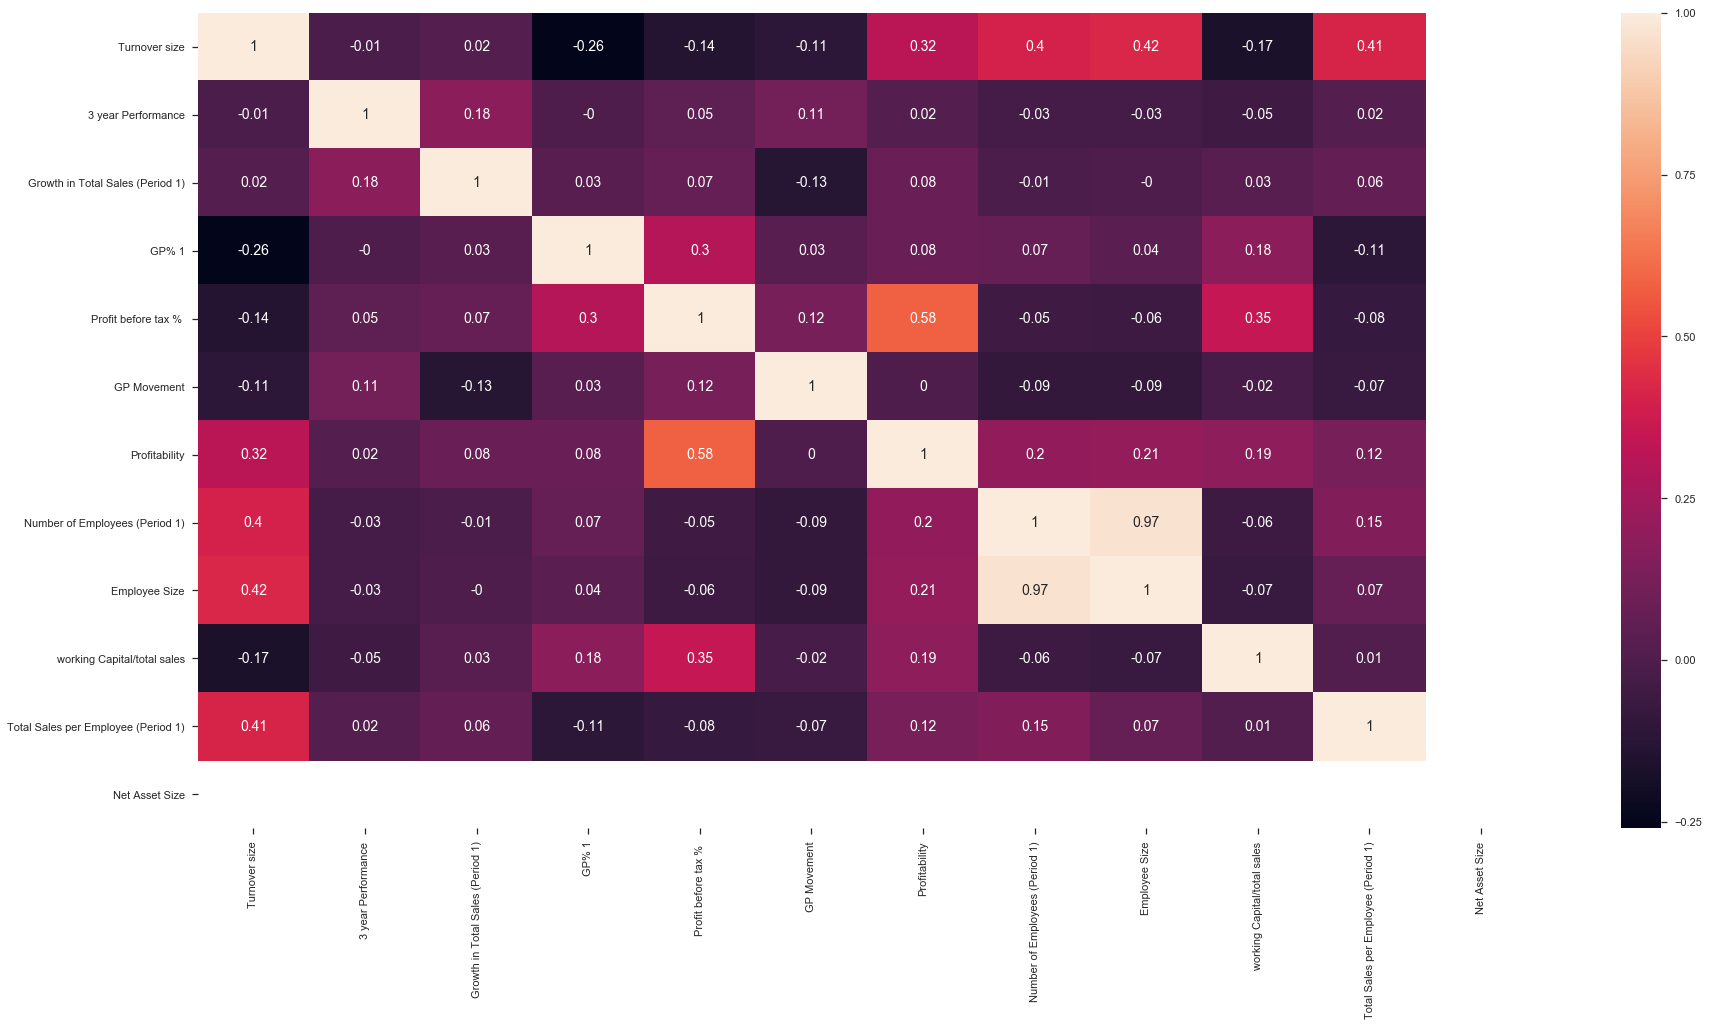

In [18]:
correlation_heatmap(data.iloc[:, :12])

In [19]:
grid = sns.PairGrid(data, size=10)

grid = grid.map_upper(plt.scatter, color = 'darkred')


grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')

# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1540: UserWarning:


c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1541: UserWarning:


c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1230: UserWarning:

No contour levels were found within the data range.

c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1540: UserWarning:


c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1541: UserWarning:


c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1230: UserWarning:

No contour levels were found within the data range.

c:\users\manos\app

c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1540: UserWarning:


c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1541: UserWarning:


c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1230: UserWarning:

No contour levels were found within the data range.

c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1540: UserWarning:


c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1541: UserWarning:


c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1230: UserWarning:

No contour levels were found within the data range.

c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1540: UserWarning:


c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.

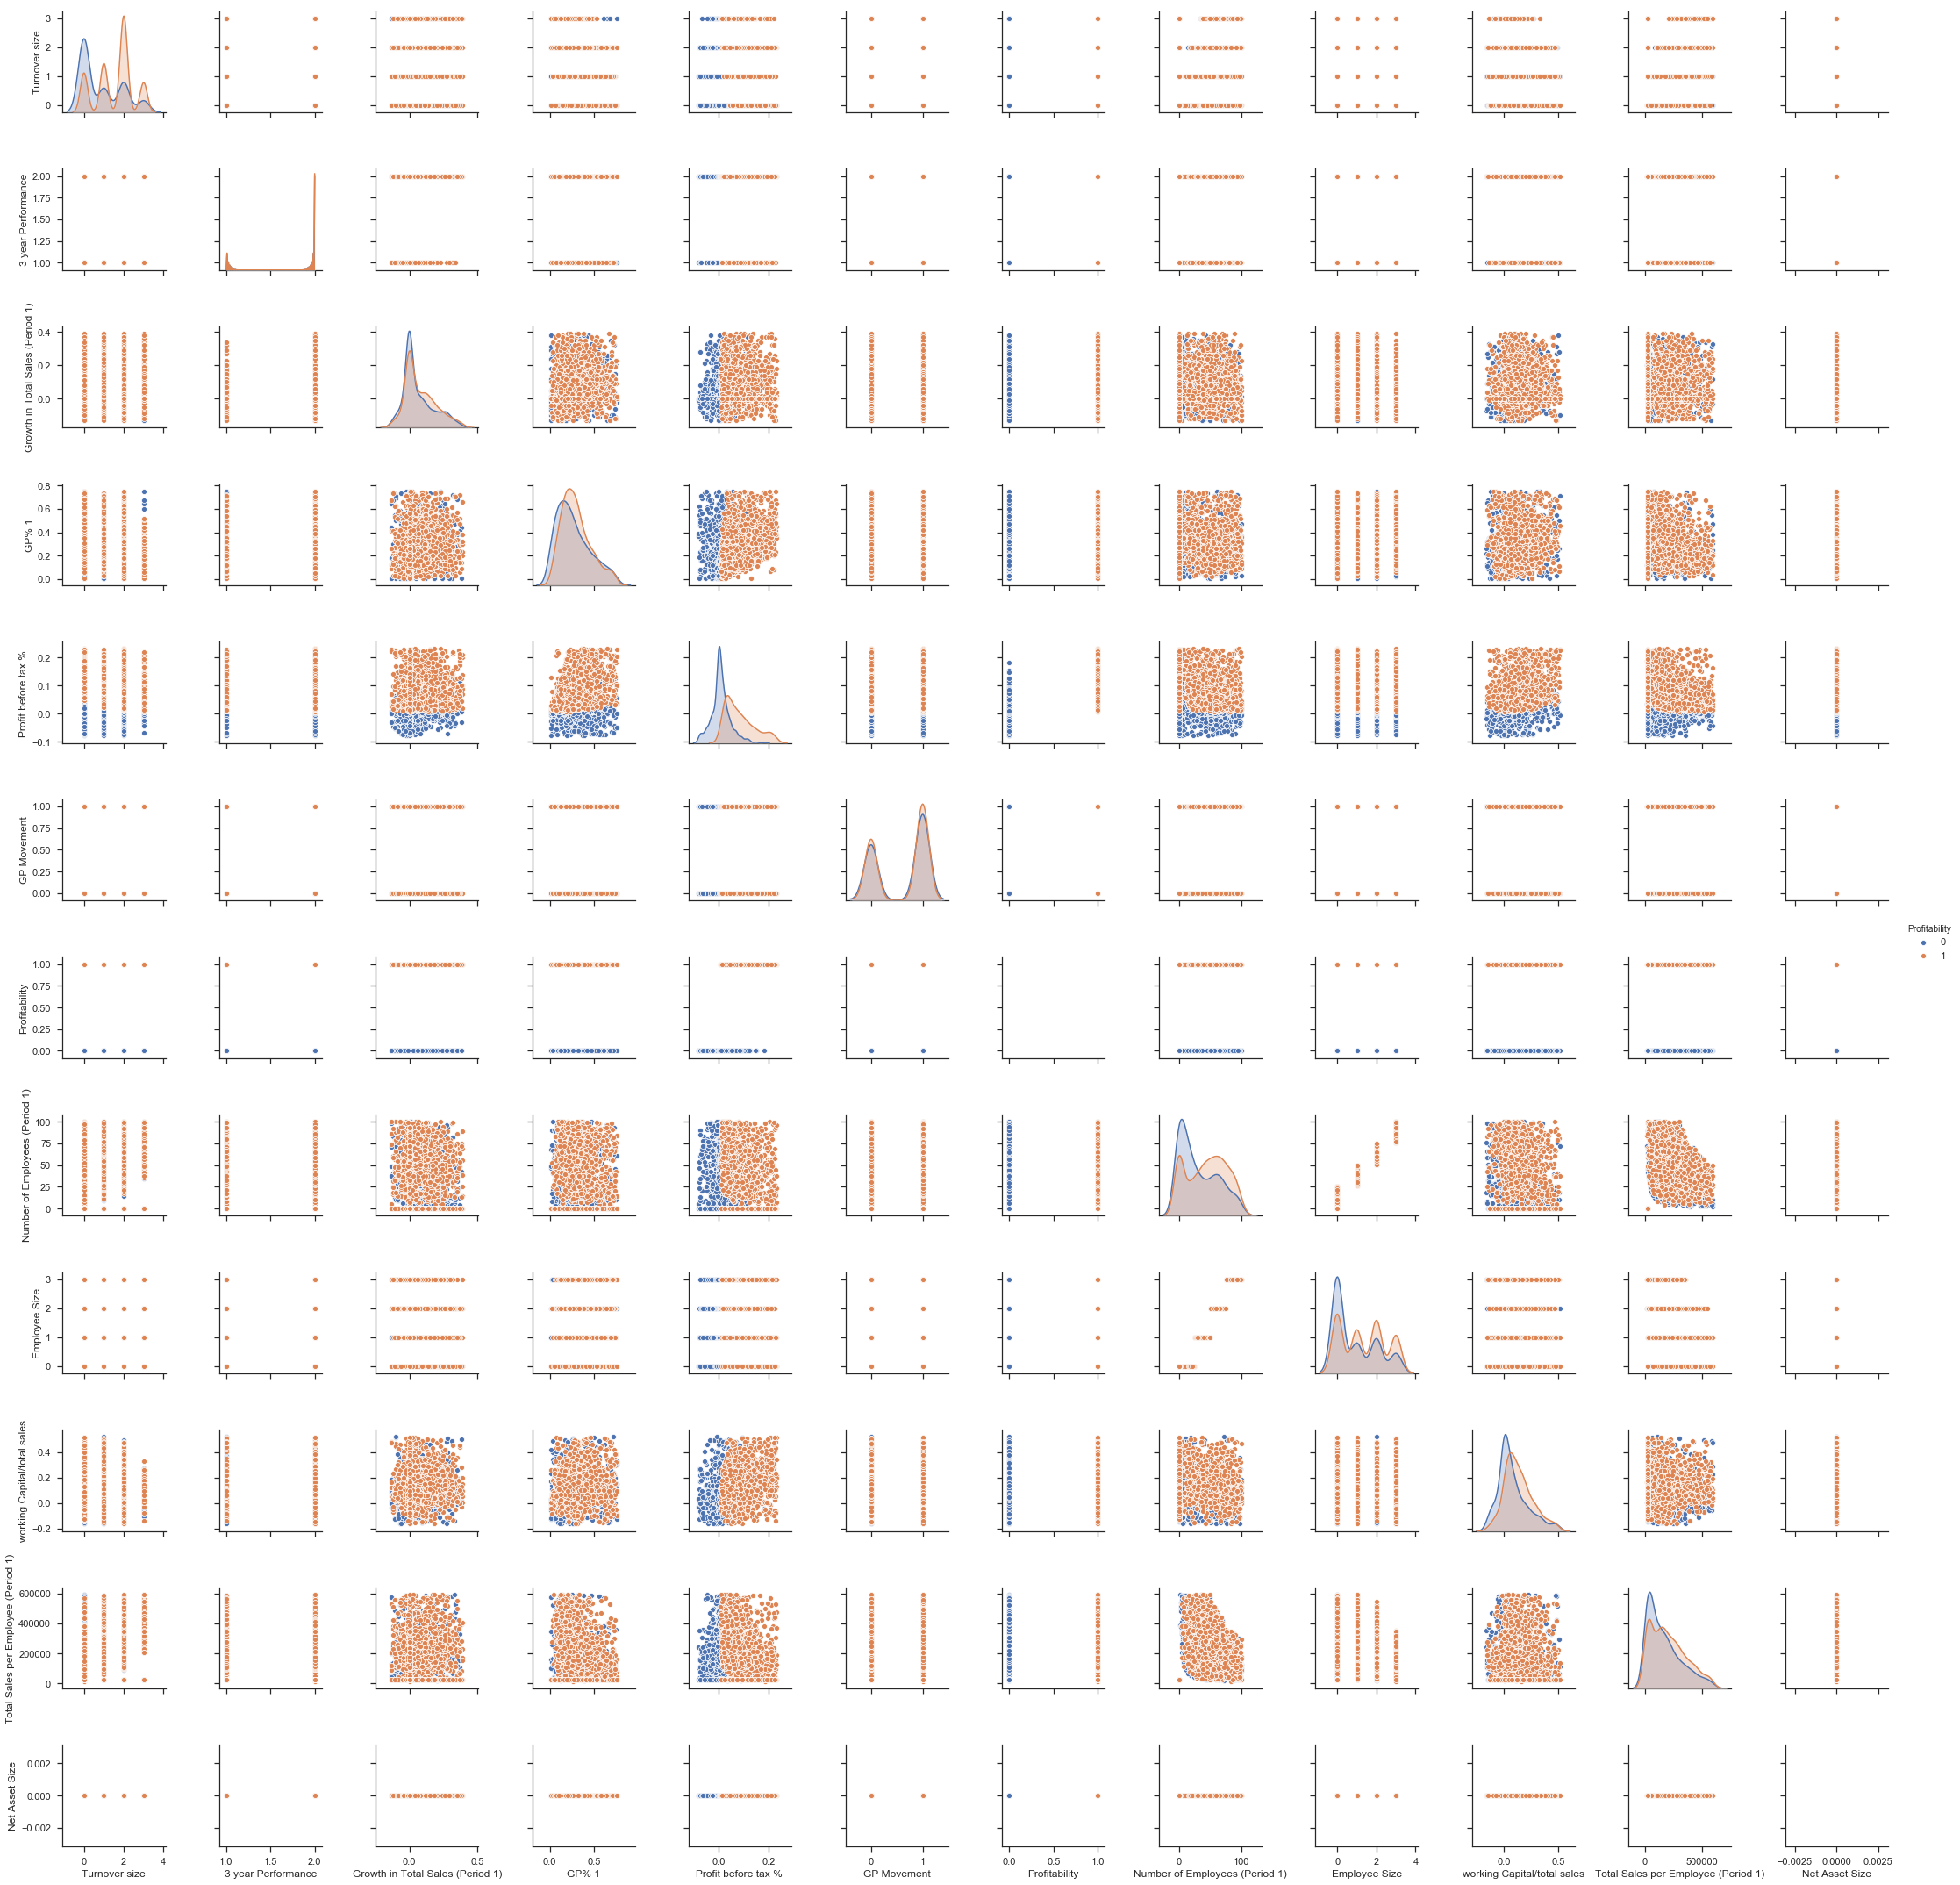

In [20]:
sns.pairplot(data, hue = 'Profitability')

In [21]:
data = data.drop(['Profit before tax % ', 'Employee Size'], axis=1)

In [22]:
data.iloc[:, :10].describe()

Turnover size  3 year Performance  Growth in Total Sales (Period 1)  \
count    2169.000000         2169.000000                       2169.000000   
mean        1.285846            1.856155                          0.074020   
std         1.032850            0.351014                          0.111404   
min         0.000000            1.000000                         -0.130000   
25%         0.000000            2.000000                          0.000000   
50%         1.000000            2.000000                          0.040000   
75%         2.000000            2.000000                          0.140000   
max         3.000000            2.000000                          0.390000   

             GP% 1  GP Movement  Profitability  \
count  2169.000000  2169.000000    2169.000000   
mean      0.285606     0.609959       0.626556   
std       0.172679     0.487872       0.483830   
min       0.010000     0.000000       0.000000   
25%       0.160000     0.000000       0.000000   
50%       0.260000     1.000000       1.000000   
75%       0.390000     1.000000       1.000000   
max       0.750000     1.000000       1.000000   

       Number of Employees (Period 1)  working Capital/total sales  \
count                     2169.000000                  2169.000000   
mean                        39.952974                     0.114048   
std                         31.306213                     0.136429   
min                          0.000000                    -0.164031   
25%                          9.000000                     0.016218   
50%                         39.000000                     0.089152   
75%                         66.000000                     0.192254   
max                        100.000000                     0.518718   

       Total Sales per Employee (Period 1)  Net Asset Size  
count                          2169.000000          2169.0  
mean                         192313.013370             0.0  
std                          151482.790641             0.0  
min                           14102.000000             0.0  
25%                           46146.000000             0.0  
50%                          161792.000000             0.0  
75%                          289770.000000             0.0  
max                          591574.000000             0.0

In [23]:
final = data

x = final.drop([predict], axis=1)

y = final[predict]

### Scale

In [24]:
if apply_standard_scaler:
    x = StandardScaler().fit_transform(x.values)
    
elif apply_normalisation:
    x = preprocessing.normalize(final, norm='l1')
    
elif apply_robust_scaler:   
    x = QuantileTransformer(n_quantiles=10, random_state=42).fit_transform(x.values) 

In [25]:
try:
    final = pd.DataFrame(x, columns = final.drop([predict], axis=1).columns)
except:
    final = pd.DataFrame(x, columns = final.columns) # In case of error use that line!

### Feature Selection

In [26]:
if apply_feature_selection:
    rfe = RFE(model, nof_features)
    
    fit_ = rfe.fit(x, y)
    
    print("Num Features: " + str(fit_.n_features_))
    
    print("Features: " + str(final.columns))
    
    print("Selected Features: " + str(fit_.support_))
    
    print("Feature Ranking: " + str(fit_.ranking_))

In [27]:
if apply_feature_selection:
    i = 0

    # Remove features based on feature selection.
    for col in final.columns:
        if not fit_.support_[i]:        
            final = final.drop([col], axis=1)

        i = i + 1

### PCA

In [28]:
if apply_pca:
    pca = PCA(variance)  

    final = pd.DataFrame(data = pca.fit_transform(x))

In [29]:
final[predict] = y.reset_index(drop=True)

In [30]:
if apply_pca: 
    print(caluclate_cumsum(final))
    
    plot_pca_variance(final)

In [31]:
if apply_pca: plot_pca(final, final[predict]) 

In [32]:
final.head()

Turnover size  3 year Performance  Growth in Total Sales (Period 1)  \
0       0.000008            0.000017                      9.927823e-07   
1       0.000010            0.000010                     -5.874966e-07   
2       0.000004            0.000004                     -1.318833e-07   
3       0.000000            0.000037                      7.366039e-07   
4       0.000006            0.000012                      1.052979e-06   

      GP% 1  GP Movement  Profitability  Number of Employees (Period 1)  \
0  0.000002     0.000000              1                        0.000637   
1  0.000002     0.000010              1                        0.000950   
2  0.000001     0.000000              1                        0.000163   
3  0.000004     0.000000              0                        0.000626   
4  0.000002     0.000006              1                        0.000372   

   working Capital/total sales  Total Sales per Employee (Period 1)  \
0                -6.295633e-07                             0.999326   
1                 1.396546e-07                             0.999009   
2                 2.023465e-06                             0.999821   
3                -3.099023e-08                             0.999332   
4                 1.702474e-06                             0.999593   

   Net Asset Size  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

### Store To Memory

In [33]:
print("Dimensions: " + str(final.shape))

%store final

%store data

%store predict

Dimensions: (2169, 10)
Stored 'final' (DataFrame)
Stored 'data' (DataFrame)
Stored 'predict' (str)


In [34]:
data.columns

Index(['Turnover size', '3 year Performance',
       'Growth in Total Sales (Period 1)', 'GP% 1', 'GP Movement',
       'Profitability', 'Number of Employees (Period 1)',
       'working Capital/total sales', 'Total Sales per Employee (Period 1)',
       'Net Asset Size'],
      dtype='object')

In [35]:
data['working Capital/total sales'].iplot(kind='hist', xTitle='Working Capital per total sales', yTitle='count', title='working Capital/total sales')